In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [79]:
data = pd.read_csv('../data/processed/data.csv')

In [80]:
data.head()

,session_id,entropy,clicks_count,durations,click_frequency,speed_cv,hover_frequency,avg_hover_duration,acceleration_mean,acceleration_std,...,acceleration_pos_neg_ratio,direction_change_frequency,idle_active_ratio,label,time_afternoon,time_evening,time_morning,time_night,time_wee_hours,new_label
0,03jt2p4bdru20sjb9me2gco6j4,3.121928,10,1606000878926,6.226647e-12,1.292750,3.265045,10044.058824,-97.987654,4076.554706,...,0.835740,0.550618,4.248230e+07,human,0,0,1,0,0,human
1,071tbv7fsev5d64kb0f9jieor6,3.221097,19,677103,2.806072e-05,0.509696,0.965173,1951.275000,-3.079521,1211.355072,...,1.013543,0.235069,2.274826e+00,advanced_bot,0,1,0,0,0,bot
2,094i85crhkpkhqpi3rl4athrn4,2.895424,17,1606000279969,1.058530e-11,0.517826,0.218432,966.923077,-94.009643,2813.920800,...,0.936106,0.246734,7.828571e+06,advanced_bot,0,0,0,1,0,bot
3,0ht0u328t4mkgi01sp7mm07e01,2.446439,10,141246,7.079847e-05,0.232604,3.927866,866.327044,-2.978588,616.098440,...,0.984024,33.136932,1.028202e+00,moderate_bot,1,0,0,0,0,bot
4,0i5kvpslrq3vb6u8ff2kuejv0v,3.452820,16,460995,3.470753e-05,0.508165,0.895245,2000.883117,-0.205002,1173.942929,...,1.024497,0.245092,2.184613e+00,advanced_bot,0,1,0,0,0,bot


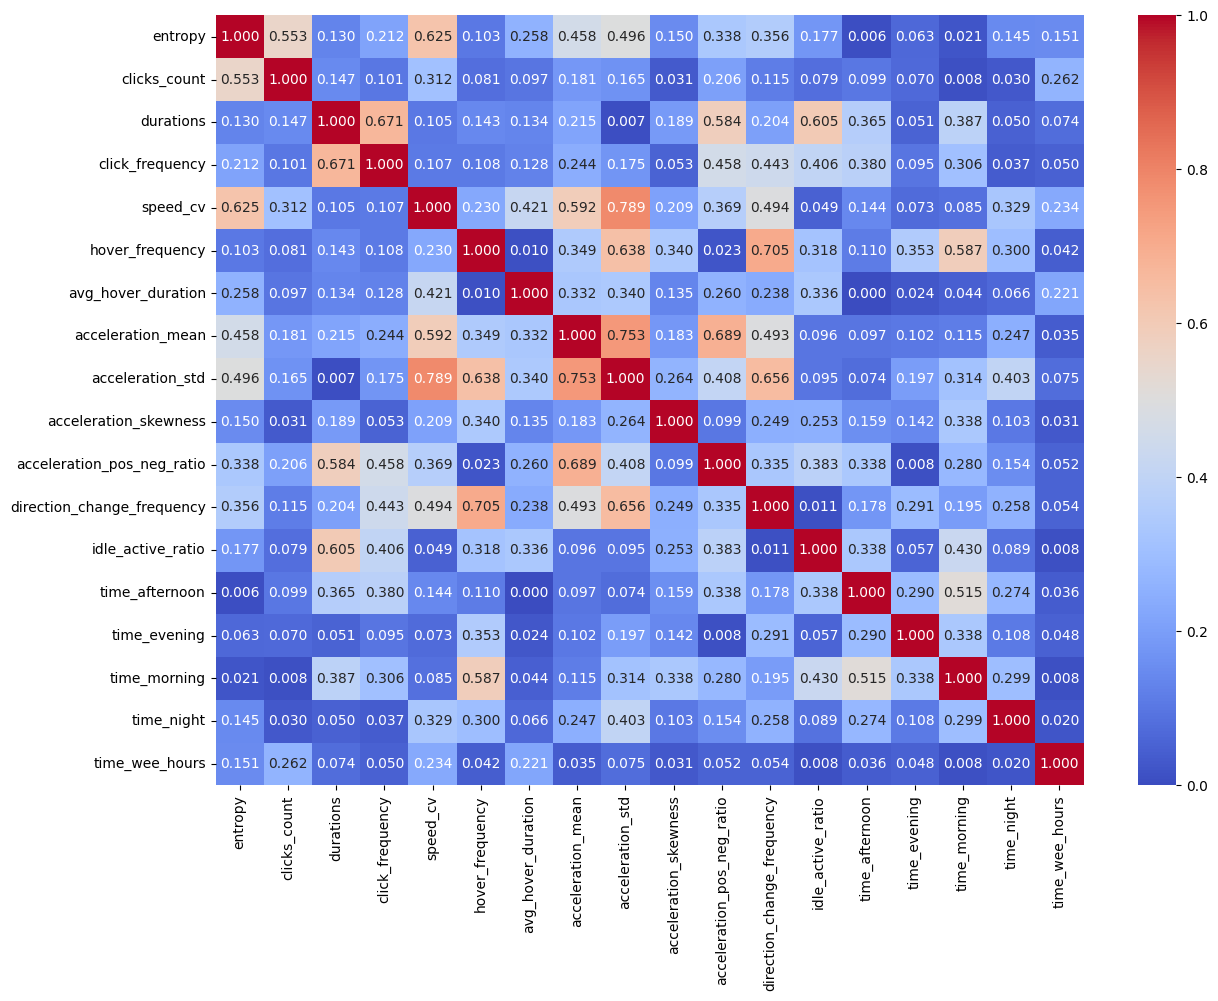

In [81]:
plt.figure(figsize=(14, 10))  # width=12 inches, height=8 inches

corr_matrix = data[[column for column in list(data.columns) if column != 'label' and column!= 'session_id' and column != 'new_label']].corr().abs()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', vmin=0, vmax=1)
plt.show()

In [82]:
corr_matrix

,entropy,clicks_count,durations,click_frequency,speed_cv,hover_frequency,avg_hover_duration,acceleration_mean,acceleration_std,acceleration_skewness,acceleration_pos_neg_ratio,direction_change_frequency,idle_active_ratio,time_afternoon,time_evening,time_morning,time_night,time_wee_hours
entropy,1.000000,0.552526,0.129710,0.212177,0.625101,0.103107,0.257840,0.458214,0.496411,0.149801,0.337506,0.356380,0.177206,0.006168,0.062557,0.021094,0.145296,0.150738
clicks_count,0.552526,1.000000,0.146948,0.101222,0.311645,0.081029,0.096993,0.181194,0.165386,0.031290,0.205927,0.114706,0.079057,0.099150,0.070216,0.008341,0.029838,0.262153
durations,0.129710,0.146948,1.000000,0.671111,0.104851,0.143340,0.134231,0.214923,0.006855,0.188808,0.583994,0.203648,0.604754,0.365085,0.051456,0.387289,0.049958,0.074312
click_frequency,0.212177,0.101222,0.671111,1.000000,0.107393,0.107748,0.127877,0.244095,0.175008,0.052797,0.457807,0.442912,0.405793,0.380077,0.094958,0.305506,0.037148,0.050443
speed_cv,0.625101,0.311645,0.104851,0.107393,1.000000,0.230255,0.420772,0.592155,0.788609,0.209486,0.369005,0.494257,0.048964,0.144491,0.073431,0.084981,0.329491,0.234067
hover_frequency,0.103107,0.081029,0.143340,0.107748,0.230255,1.000000,0.009874,0.348675,0.638311,0.339996,0.022976,0.705047,0.317903,0.109565,0.353053,0.586527,0.299683,0.042223
avg_hover_duration,0.257840,0.096993,0.134231,0.127877,0.420772,0.009874,1.000000,0.332098,0.340499,0.134658,0.259691,0.237889,0.336230,0.000329,0.024352,0.043979,0.065690,0.221472
acceleration_mean,0.458214,0.181194,0.214923,0.244095,0.592155,0.348675,0.332098,1.000000,0.752590,0.182515,0.688877,0.492715,0.095696,0.096514,0.102124,0.114968,0.246593,0.035460
acceleration_std,0.496411,0.165386,0.006855,0.175008,0.788609,0.638311,0.340499,0.752590,1.000000,0.263776,0.407797,0.655525,0.095060,0.074498,0.196735,0.314406,0.402778,0.075029
acceleration_skewness,0.149801,0.031290,0.188808,0.052797,0.209486,0.339996,0.134658,0.182515,0.263776,1.000000,0.098739,0.248708,0.252580,0.159233,0.142163,0.337558,0.103184,0.030696


In [83]:
import pandas as pd

# Compute absolute correlation matrix excluding 'label' and 'session_id'
corr_matrix = data[[col for col in data.columns if col not in ['label', 'session_id', 'new_label']]].corr().abs()

# Extract upper triangle of the correlation matrix without the diagonal
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find feature pairs with correlation greater than 0.4
high_corr = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 != col2 and corr_matrix.loc[col1, col2] > 0.4
]

# Remove duplicates like (A, B) and (B, A)
high_corr_unique = [
    (col1, col2, corr)
    for (col1, col2, corr) in high_corr
    if corr_matrix.columns.get_loc(col1) < corr_matrix.columns.get_loc(col2)
]

# View results
for var1, var2, corr_val in high_corr_unique:
    print(f"{var1} - {var2}: {corr_val:.2f}")


entropy - clicks_count: 0.55
entropy - speed_cv: 0.63
entropy - acceleration_mean: 0.46
entropy - acceleration_std: 0.50
durations - click_frequency: 0.67
durations - acceleration_pos_neg_ratio: 0.58
durations - idle_active_ratio: 0.60
click_frequency - acceleration_pos_neg_ratio: 0.46
click_frequency - direction_change_frequency: 0.44
click_frequency - idle_active_ratio: 0.41
speed_cv - avg_hover_duration: 0.42
speed_cv - acceleration_mean: 0.59
speed_cv - acceleration_std: 0.79
speed_cv - direction_change_frequency: 0.49
hover_frequency - acceleration_std: 0.64
hover_frequency - direction_change_frequency: 0.71
hover_frequency - time_morning: 0.59
acceleration_mean - acceleration_std: 0.75
acceleration_mean - acceleration_pos_neg_ratio: 0.69
acceleration_mean - direction_change_frequency: 0.49
acceleration_std - acceleration_pos_neg_ratio: 0.41
acceleration_std - direction_change_frequency: 0.66
acceleration_std - time_night: 0.40
idle_active_ratio - time_morning: 0.43
time_afternoon

Before removing features

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

feature_cols = [col for col in data.columns if col not in ['label', 'session_id', 'new_label']]
X = data[feature_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = feature_cols
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["VIF"] = vif_data["VIF"].round(4)
print(vif_data)

                       feature      VIF
0                      entropy   2.8505
1                 clicks_count   1.9687
2                    durations  11.6620
3              click_frequency   2.4038
4                     speed_cv   8.7566
5              hover_frequency   9.1109
6           avg_hover_duration   1.7922
7            acceleration_mean   3.1252
8             acceleration_std  12.3159
9        acceleration_skewness   1.2709
10  acceleration_pos_neg_ratio  65.6829
11  direction_change_frequency   4.7386
12           idle_active_ratio   2.7649
13              time_afternoon   8.7329
14                time_evening   5.4939
15                time_morning  14.6890
16                  time_night   5.4671
17              time_wee_hours   1.3988


After removing features

Features removed: 'entropy', 'acceleration_pos_neg_ratio','acceleration_std','clicks_count','durations','hover_frequency','speed_cv'
Features remaining: 'click_frequency', 'avg_hover_duration', 'acceleration_mean', 'acceleration_skewness', 'direction_change_frequency', 'idle_active_ratio', 'time_morning', 'time_afternoon', 'time_evening', 'time_night', 'time_wee_hours'

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

feature_cols = [col for col in data.columns if col not in ['label', 'session_id', 'new_label', 'entropy', 'acceleration_pos_neg_ratio','acceleration_std','clicks_count', 'durations','hover_frequency','speed_cv']]
X = data[feature_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = feature_cols
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["VIF"] = vif_data["VIF"].round(4)
print(vif_data)


                       feature     VIF
0              click_frequency  2.1255
1           avg_hover_duration  2.0489
2            acceleration_mean  2.6801
3        acceleration_skewness  1.3725
4   direction_change_frequency  2.8237
5            idle_active_ratio  2.9677
6               time_afternoon  2.2122
7                 time_evening  1.3308
8                 time_morning  2.7533
9                   time_night  1.4573
10              time_wee_hours  1.0834


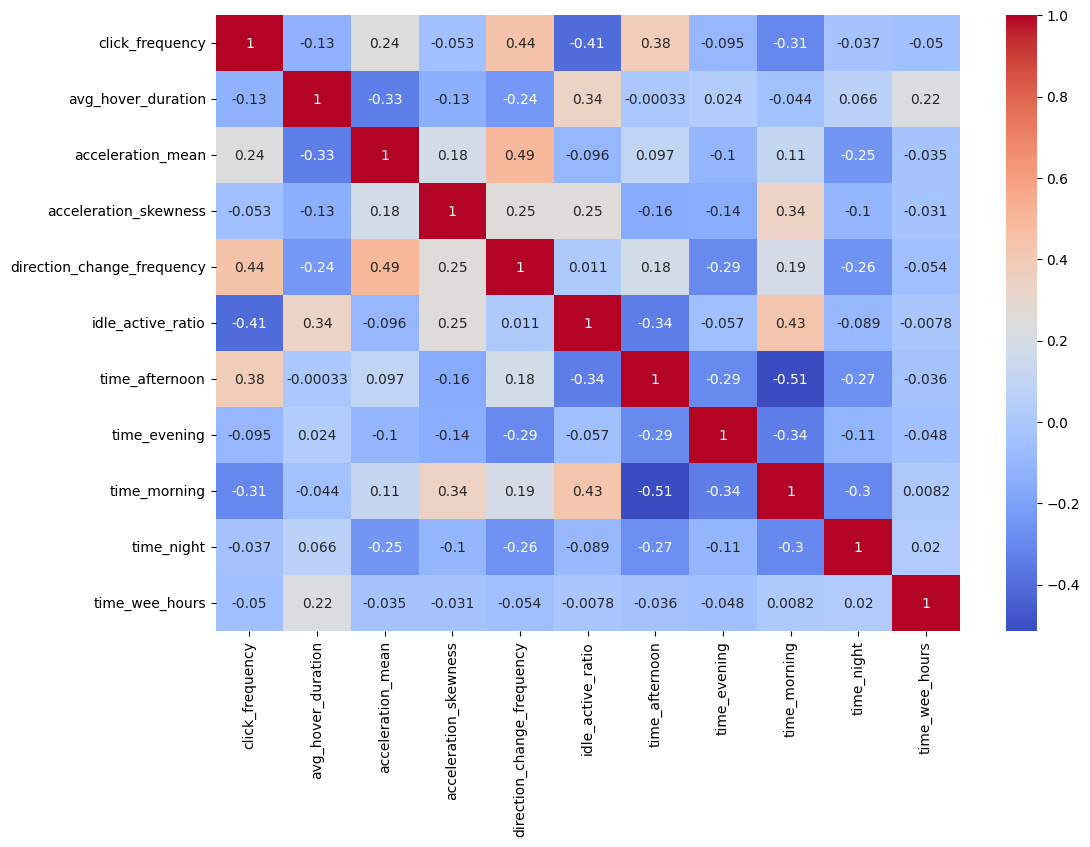

KeyError: 'entropy'

In [86]:
# Set the figure size BEFORE plotting
plt.figure(figsize=(12, 8))  # width=12 inches, height=8 inches

# Check correlations
corr = X.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# Focus on correlations involving the feature with VIF=6
print(corr["entropy"].sort_values(ascending=False))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X1 = X[[col for col in list(X.columns) if col != 'entropy']]
y = X['entropy']

model = LinearRegression()
model.fit(X1, y)

r2 = model.score(X1, y)
print(f"R^2 for Entropy regressed on others: {r2}")

R^2 for Entropy regressed on others: 0.35585172041405677


In [ ]:
import statsmodels.api as sm

X1 = sm.add_constant(X1)
model = sm.OLS(y, X1).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                entropy   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     24.20
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           2.45e-36
Time:                        22:51:09   Log-Likelihood:                -349.72
No. Observations:                 449   AIC:                             721.4
Df Residuals:                     438   BIC:                             766.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Standardize dataset to verify if condition number is still large.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the independent variables
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
# don't need to scale y

# Add constant to the standardized data
X1_scaled = sm.add_constant(X1_scaled)

# Fit the OLS model
model = sm.OLS(y, X1_scaled).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                entropy   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     24.20
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           2.45e-36
Time:                        22:51:09   Log-Likelihood:                -349.72
No. Observations:                 449   AIC:                             721.4
Df Residuals:                     438   BIC:                             766.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9575      0.025    117.393      0.0

Check covariance

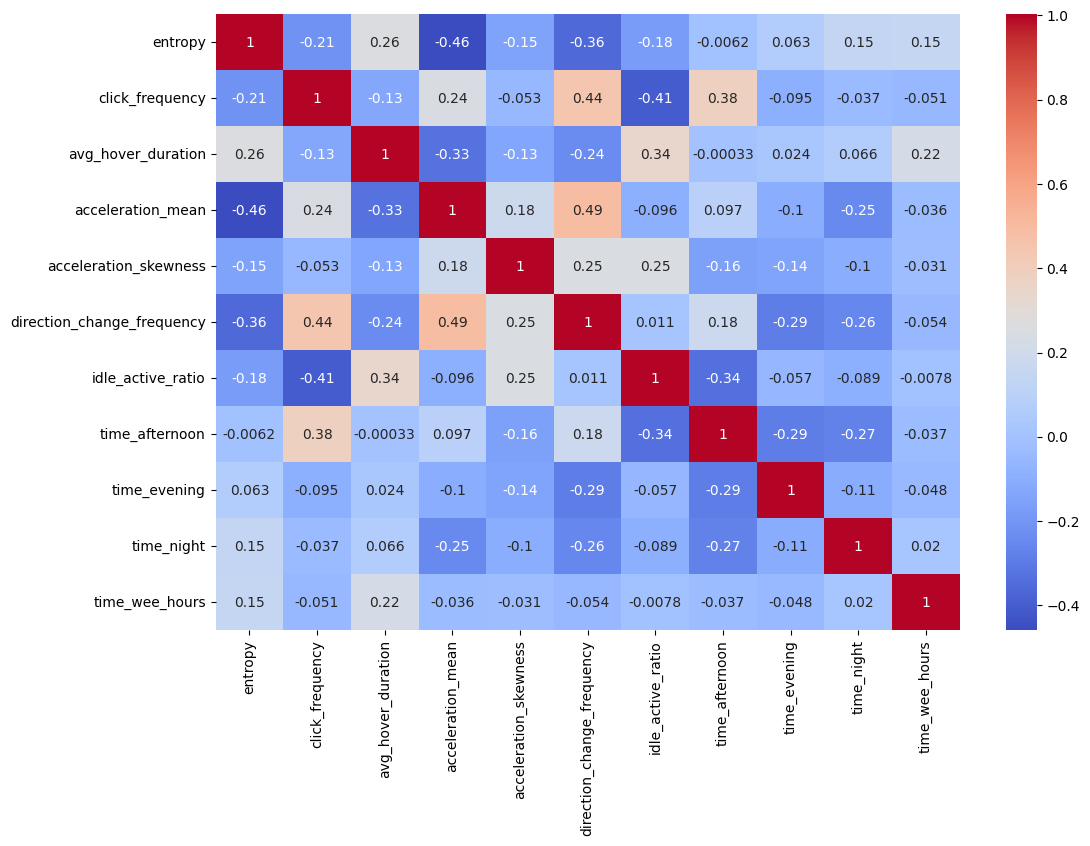

In [ ]:
# Set the figure size BEFORE plotting
plt.figure(figsize=(12, 8))  # width=12 inches, height=8 inches
# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
# Check correlations
cov = pd.DataFrame(X_scaled_df).cov()

sns.heatmap(cov, annot=True, cmap="coolwarm")
plt.show()



In [ ]:
#pd.set_option('display.float_format', '{:.4f}'.format)